In [50]:
import re
import pandas as pd
import matplotlib.pyplot as plt
path = '/Users/moizpro/Desktop/results/base/mobilenet_v3_small-15.txt'
# Open the text file and read its contents
with open(path, 'r') as file:
    file_contents = file.read()

# Define the regex pattern to match all numbers
p_acc = r"(?:Acc\s+)(\d{1,3}\.\d{1,2})"
p_xent = r"(?:Xent\s+)(\d{1}\.\d{4})"
p_htri = r"(?:Htri\s+)(\d{1}\.\d{4})"
p_epoch = r"(?:Epoch:\s+\[)(\d{1,2})"
# Use the findall method from the re module to extract all matches
acc_s = re.findall(p_acc, file_contents)
xent_s = re.findall(p_xent, file_contents)
htri_s = re.findall(p_htri, file_contents)
epoch_s = re.findall(p_epoch, file_contents)

# Convert each string to a float using list comprehension
acc = [float(string) for string in acc_s]
xent = [float(string) for string in xent_s]
htri = [float(string) for string in htri_s]
epoch = [int(string) for string in epoch_s]

# Print the array of numbers
logs = pd.DataFrame({'Epoch': epoch, 'Acc': acc, 'Xent': xent, 'Htri': htri})


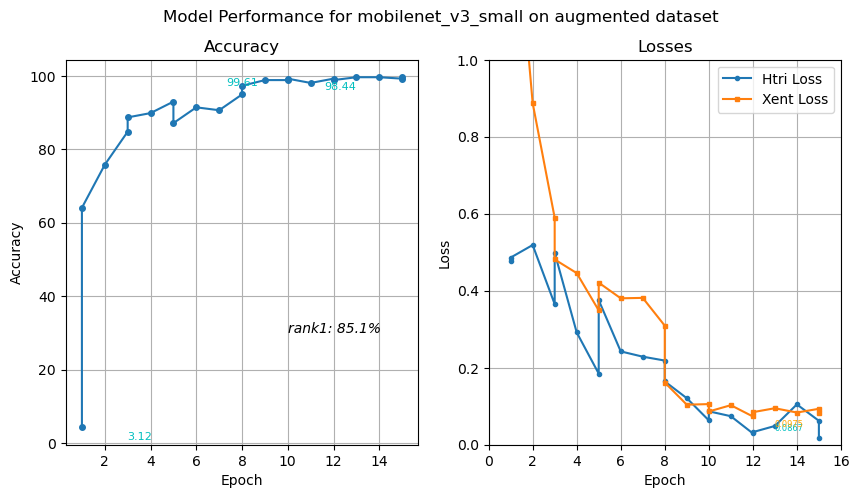

In [51]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


# Plot the accuracy on the first subplot
ax1.plot(logs['Epoch'][::14], logs['Acc'][::14], marker='o', markersize=4)

begin_index = 2
ax1.annotate(f"{logs['Acc'][begin_index]:.2f}", xy=(logs['Epoch'][begin_index], logs['Acc'][begin_index]),
                 xytext=(logs['Epoch'][begin_index]+2, logs['Acc'][begin_index]-0.05),
                 fontsize=8, color='c', ha='left', va='top')
# Add an annotation to the middle and the end of the line in the first subplot
mid_index = len(logs['Epoch']) // 2
ax1.annotate(f"{logs['Acc'][mid_index]:.2f}", xy=(logs['Epoch'][mid_index], logs['Acc'][mid_index]),
                xytext=(logs['Epoch'][mid_index], logs['Acc'][mid_index]-0.05),
                fontsize=8, color='c', ha='center', va='top')
end_index = len(logs['Epoch']) - 1
ax1.annotate(f"{logs['Acc'][end_index]:.2f}", xy=(logs['Epoch'][end_index], logs['Acc'][end_index]),
                 xytext=(logs['Epoch'][end_index]-2, logs['Acc'][end_index]-0.05),
                 fontsize=8, color='c', ha='right', va='top')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy')
ax1.grid(True)

# Plot the htri_loss and xent_loss on the second subplot
ax2.plot(logs['Epoch'][::14], logs['Htri'][::14], label='Htri Loss', marker='o', markersize=3)
ax2.plot(logs['Epoch'][::14], logs['Xent'][::14], label='Xent Loss', marker='s', markersize=3)

end_index = len(logs['Epoch']) - 1
ax2.annotate(f"{logs['Htri'][end_index]:.4f}", xy=(logs['Epoch'][end_index], logs['Htri'][end_index]),
                 xytext=(logs['Epoch'][end_index]-2, logs['Htri'][end_index]-0.05),
                 fontsize=6, color='c')
ax2.annotate(f"{logs['Xent'][end_index]:.4f}", xy=(logs['Epoch'][end_index], logs['Xent'][end_index]),
                 xytext=(logs['Epoch'][end_index]-2, logs['Xent'][end_index]-0.05),
                 fontsize=6, color='orange')


ax2.legend()
ax2.set_ylim([0, 1.0])
ax2.set_xlim([0, 16])
ax2.grid(True)
ax2.set_title('Losses')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')

# Set the overall title for the figure
fig.suptitle('Model Performance for mobilenet_v3_small-15')

# Display the plot
plt.show()
